# **Analyzing Show Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
show = pd.read_csv('show_data.csv')
show.sort_values(['Season', 'Number'], inplace=True)
show.set_index(np.arange(1, 74))

,Title,Runtime,Rating,Season,Number
1,Winter Is Coming,62,9.1,1,1
2,The Kingsroad,56,8.8,1,2
3,Lord Snow,58,8.7,1,3
4,"Cripples, Bastards, and Broken Things",56,8.8,1,4
5,The Wolf and the Lion,55,9.1,1,5
...,...,...,...,...,...
69,A Knight of the Seven Kingdoms,58,7.8,8,2
70,The Long Night,82,7.5,8,3
71,The Last of the Starks,78,5.5,8,4
72,The Bells,78,6.0,8,5


#### **Question 1: How many episodes does the show have?**

In [27]:
print(f"The show has {show.shape[0]} episodes.")

The show has 73 episodes.


#### **Question 2: What's the average rating of the show?**

In [25]:
print(f"The average rating of the shows is {show['Rating'].mean().round(2)} stars.")

The average rating of the shows is 8.84 stars.


#### **Question 3: What are the highest rated episodes?**

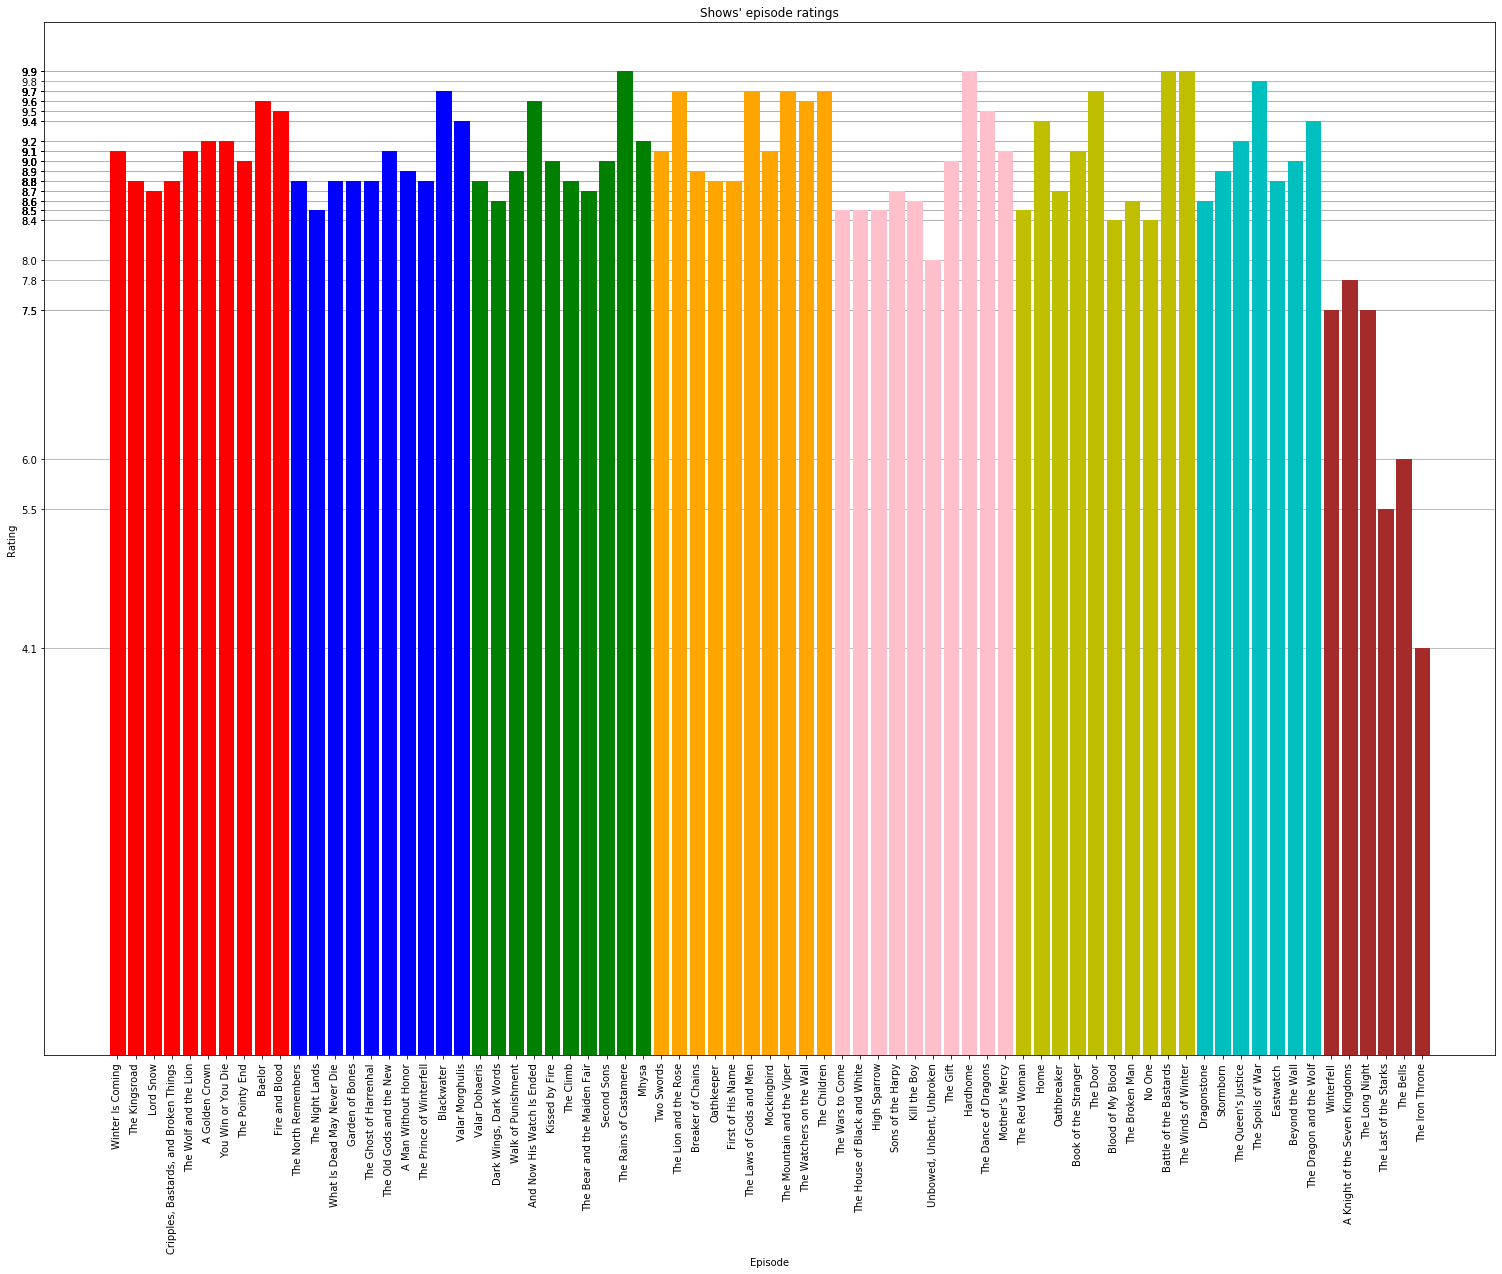

In [5]:
season_colors = ['r', 'b', 'g', 'orange', 'pink', 'y', 'c', 'brown']

plt.figure(figsize=(26, 19))
plt.title('Shows\' episode ratings')

plt.grid(axis='y', zorder=0)
barlist = plt.bar(show['Title'], show['Rating'], zorder=3)

for i in range(show.shape[0]):
    barlist[i].set_color(season_colors[show.iloc[i]['Season'] - 1])

plt.xticks(rotation='vertical')
plt.yticks(show['Rating'])
plt.ylabel('Rating')
plt.xlabel('Episode')
plt.show()

In [6]:
high = show[show['Rating'] == show['Rating'].max()]
high

,Title,Runtime,Rating,Season,Number
51,The Rains of Castamere,51,9.9,3,9
30,Hardhome,61,9.9,5,8
21,Battle of the Bastards,60,9.9,6,9
22,The Winds of Winter,68,9.9,6,10


#### **Question 4: What is the highest rated season?**

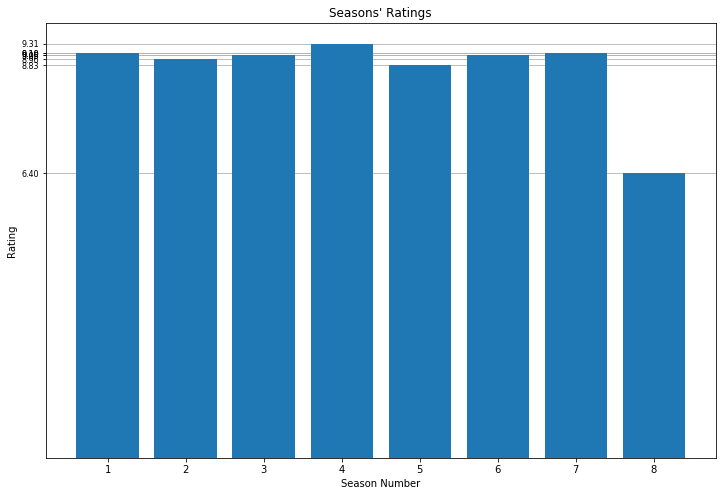

In [7]:
ratings = show.groupby('Season').mean()['Rating']

plt.figure(figsize=(12, 8))
plt.title('Seasons\' Ratings')

plt.grid(axis='y', zorder=0)
plt.bar(ratings.index, ratings, zorder=3)

plt.yticks(ratings, fontsize=8)
plt.ylabel('Rating')
plt.xlabel('Season Number')
plt.show()

#### **Question 5: How long is each season?**

In [8]:
runtimes = show.groupby('Season').sum()['Runtime']

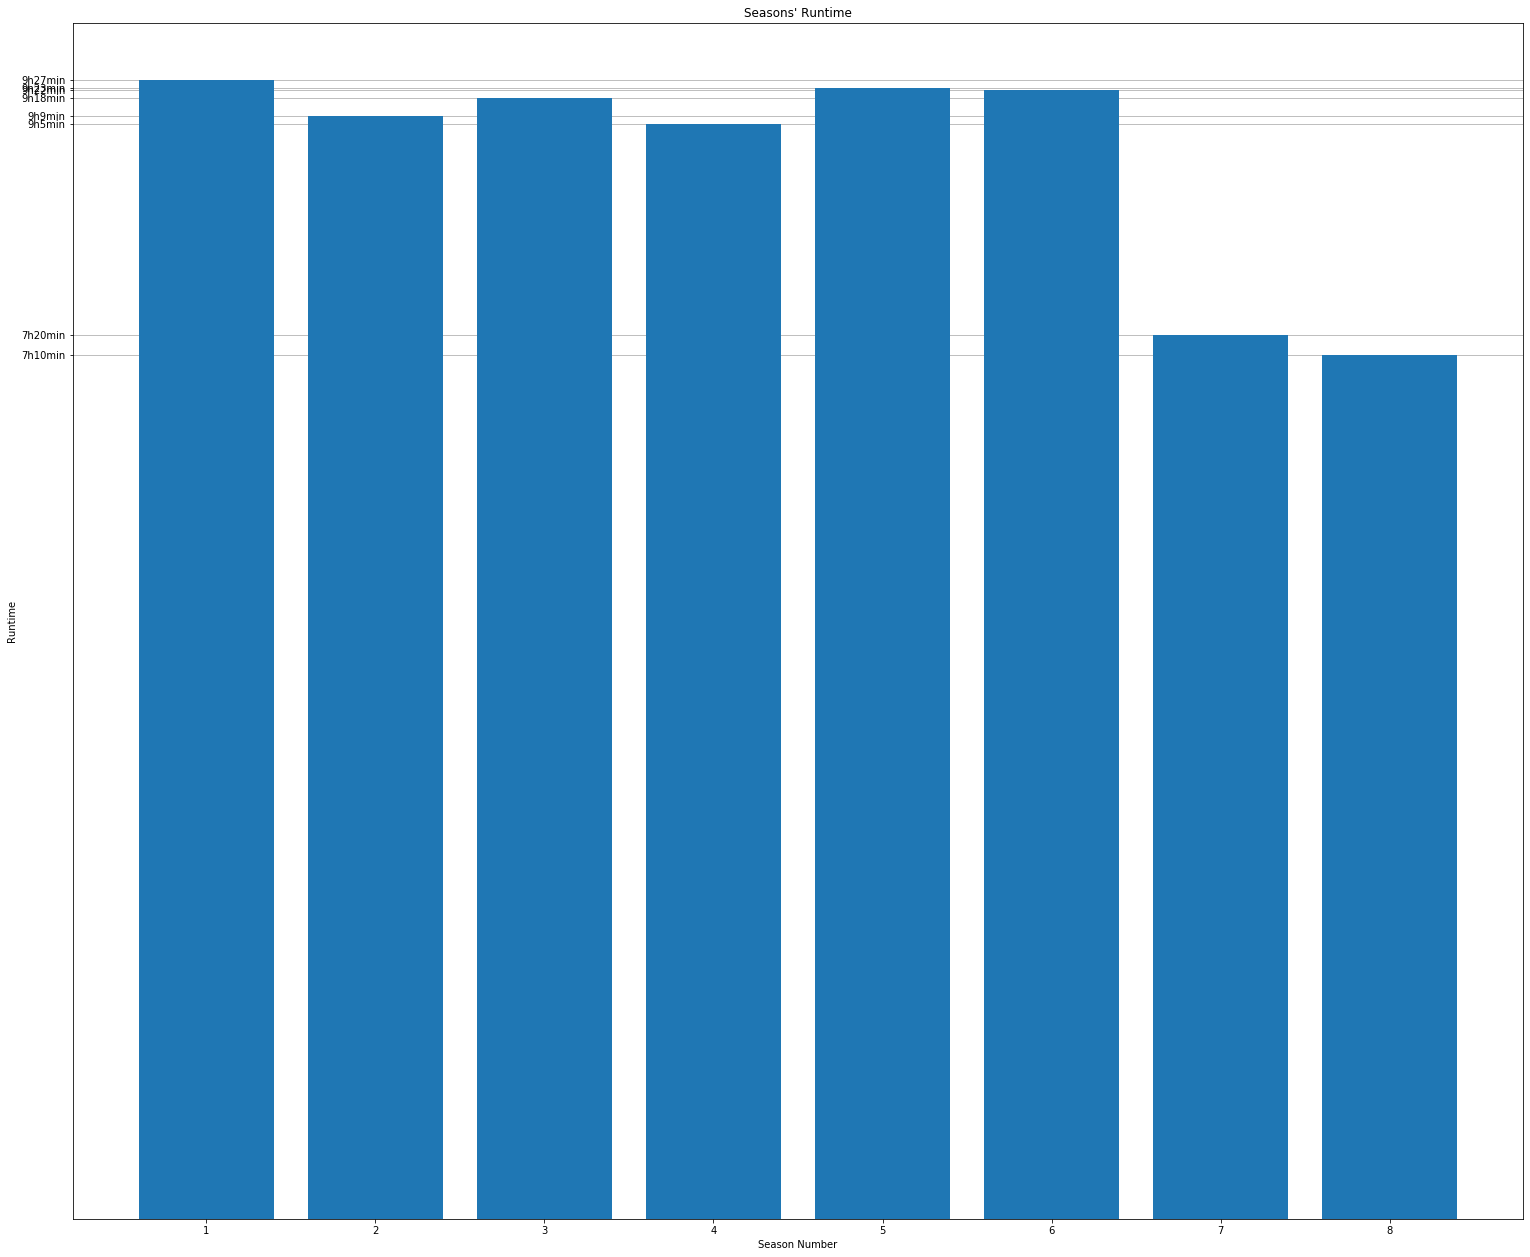

In [12]:
plt.figure(figsize=(26, 22))
plt.title('Seasons\' Runtime')

times = [str(int(runtime / 60)) +"h"+ str(runtime%60) + "min" for runtime in runtimes]

plt.grid(axis='y', zorder=0)
plt.bar(runtimes.index, runtimes, zorder=3)

plt.yticks(runtimes, labels=times)
plt.ylabel('Runtime')
plt.xlabel('Season Number')
plt.show()

#### **Question 7: How much percentage of the show is each season?**

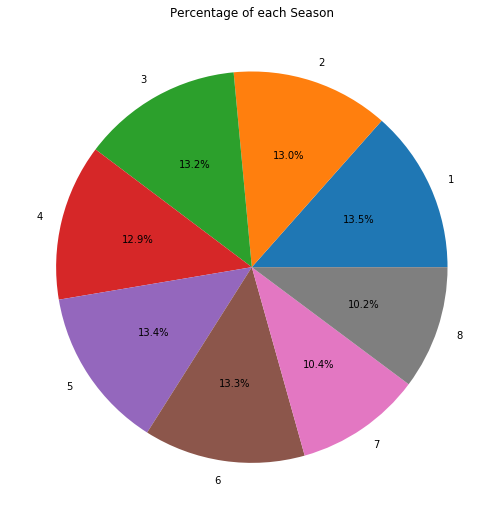

In [14]:
plt.figure(figsize=(16, 9))
plt.title('Percentage of each Season')
plt.pie(runtimes, labels=runtimes.index, autopct='%1.1f%%')
plt.show()

#### **Question 6: How long does it take to watch the whole show?**

In [22]:
summed = runtimes.sum()
hours = int(summed / 60)
days = int(hours / 24)
hours = hours % 24
minutes = summed % 60

print(f"It takes {days} days, {hours} hours and {minutes} minutes to watch the whole show.")

It takes 2 days, 22 hours and 14 minutes to watch the whole show.
